<a href="https://colab.research.google.com/github/harshitbhavnani/Machine-Learning/blob/master/Machine_Learning_Lab12_Exp12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Harshit Bhavnani**
**Roll No: J076**

**Experiment / Lab: 12**

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

!wget -O AirQualityUCI.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip
df = pd.read_excel('/content/AirQualityUCI.xlsx', parse_dates=[['Date', 'Time']])
df.replace(to_replace=-200.0, value=0.0, inplace=True)
wv = df['NMHC(GT)']
bad_wv = wv == -200.0
wv[bad_wv] = 0.0

y
--2020-11-01 17:29:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  3.78MB/s    in 0.4s    

2020-11-01 17:29:28 (3.78 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]

Archive:  AirQualityUCI.zip
replace AirQualityUCI.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: AirQualityUCI.csv       
replace AirQualityUCI.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: AirQualityUCI.xlsx      


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [82]:
y = 'NO2(GT)'
y

'NO2(GT)'

In [83]:
df.isnull().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_Time      9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1023.5 KB


In [85]:
df.corr()[[y]]

,NO2(GT)
CO(GT),0.723154
PT08.S1(CO),0.284508
NMHC(GT),0.099541
C6H6(GT),0.402581
PT08.S2(NMHC),0.334108
NOx(GT),0.795888
PT08.S3(NOx),-0.440202
NO2(GT),1.000000
PT08.S4(NO2),0.010185
PT08.S5(O3),0.439057


In [86]:
df = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','PT08.S2(NMHC)', 'NOx(GT)','NO2(GT)','PT08.S5(O3)']]

In [87]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S5(O3)
0,2.6,1360.00,150,1045.50,166.0,113.0,1267.50
1,2.0,1292.25,112,954.75,103.0,92.0,972.25
2,2.2,1402.00,88,939.25,131.0,114.0,1074.00
3,2.2,1375.50,80,948.25,172.0,122.0,1203.25
4,1.6,1272.25,51,835.50,131.0,116.0,1110.00


In [88]:
X = df.drop(y,axis=1)
y = df[[y]]

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)
value = y_test

In [90]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(7017, 6)
(2340, 6)
(7017, 1)
(2340, 1)


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
scaler.fit(x_test)
x_test = scaler.fit_transform(x_test)
scaler.fit(y_train)
y_train = scaler.fit_transform(y_train)
scaler.fit(y_test)
y_test = scaler.fit_transform(y_test)

In [92]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print (x_train.shape)
print (x_test.shape)

(7017, 6, 1)
(2340, 6, 1)


In [93]:
print (y_train.shape)
print (y_test.shape)

(7017, 1)
(2340, 1)


In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
def RNN_MODEL():
    
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])
    return regressor

In [95]:
regressor = RNN_MODEL()

In [96]:
regressor.fit(x_train,y_train,epochs = 100)

Epoch 1/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0251 - accuracy: 0.1759
Epoch 2/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0219 - accuracy: 0.1757
Epoch 3/100
220/220 [==============================] - 2s 10ms/step - loss: 0.0198 - accuracy: 0.1756
Epoch 4/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0179 - accuracy: 0.1756
Epoch 5/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0165 - accuracy: 0.1753
Epoch 6/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0160 - accuracy: 0.1756
Epoch 7/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0154 - accuracy: 0.1754
Epoch 8/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0151 - accuracy: 0.1753
Epoch 9/100
220/220 [==============================] - 2s 11ms/step - loss: 0.0145 - accuracy: 0.1757
Epoch 10/100
220/220 [==============================] - 2s 11ms/step - loss: 0.013

In [97]:
regressor.evaluate(x_test,y_test)

74/74 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.1748


[0.008109844289720058, 0.17478632926940918]

In [99]:
y_pred = regressor.predict(x_test)
y_pred

array([[0.3404587 ],
       [0.3635194 ],
       [0.4442576 ],
       ...,
       [0.3027532 ],
       [0.31456056],
       [0.40335327]], dtype=float32)

In [100]:
output = scaler.inverse_transform(y_pred)
real_output = []
for item in output:
    real_output.append((item[0]))

In [101]:
value['predicted'] = np.array(real_output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (100,100)
%matplotlib inline

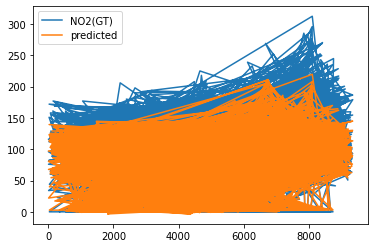

In [103]:
value.plot()